In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.tree import plot_tree, export_text
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
 def importdata(): 
    balance_data = pd.read_csv( 
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data', 
    sep= ',', header = None)
    print ("Dataset Shape: ", balance_data.shape) 
    print ("Dataset: \n")
    print(balance_data.head())
    return balance_data 

In [4]:
def splitdataset(balance_data): 
   
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 0]  
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3) 
    return X, Y, X_train, X_test, y_train, y_test 

In [5]:
 def train_using_gini(X_train, X_test, y_train): 
    clf_gini = DecisionTreeClassifier(criterion = "gini") 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [6]:
def train_using_entropy(X_train, X_test, y_train): 
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth=3)  
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [7]:
def prediction(X_test, clf_object): 
    y_pred = clf_object.predict(X_test) 
    return y_pred 

In [8]:
def cal_accuracy(y_test, y_pred):   
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100)

In [9]:
def plot_tree_graph(clf):
    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True)
    plt.show()

In [10]:
data = importdata() 
X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
clf_gini = train_using_gini(X_train, X_test, y_train) 
clf_entropy = train_using_entropy(X_train, X_test, y_train) 

Dataset Shape:  (625, 5)
Dataset: 

   0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


In [11]:
print("Gini Index:")
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini)

Gini Index:
Accuracy :  81.38297872340425


In [12]:
print("Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy)

Entropy:
Accuracy :  70.2127659574468


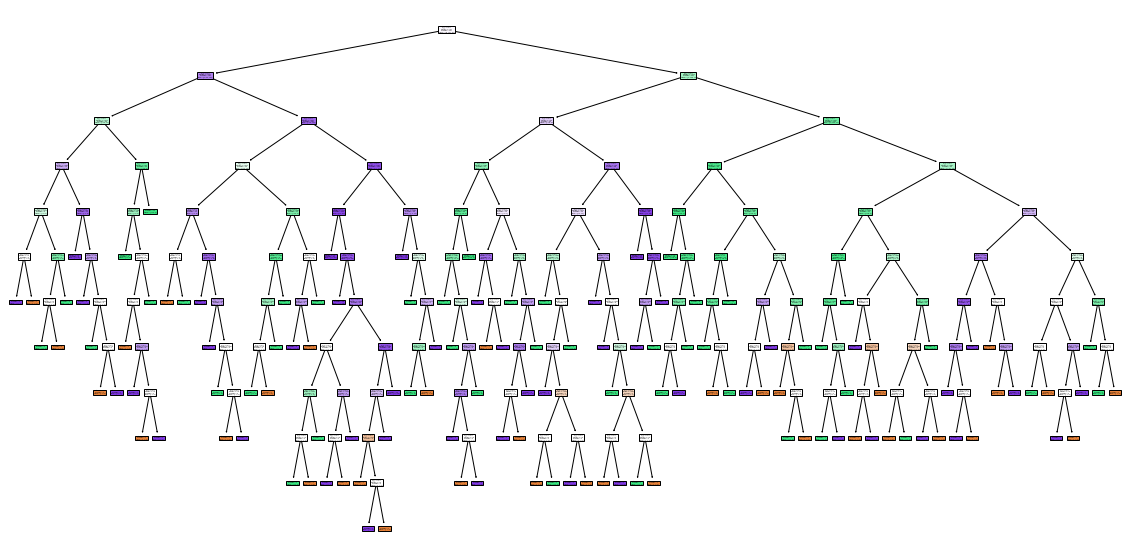

In [13]:
plot_tree_graph(clf_gini)

In [14]:
print(export_text(clf_gini))

|--- feature_0 <= 2.50
|   |--- feature_2 <= 1.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- feature_3 <= 2.50
|   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |--- class: R
|   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |--- class: L
|   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |--- class: L
|   |   |   |--- feature_3 >  2.50
|   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |--- class: R
|   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |--- class: R
|   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |--- feature_3 <= 3.50
|   |   |   |   |   |   

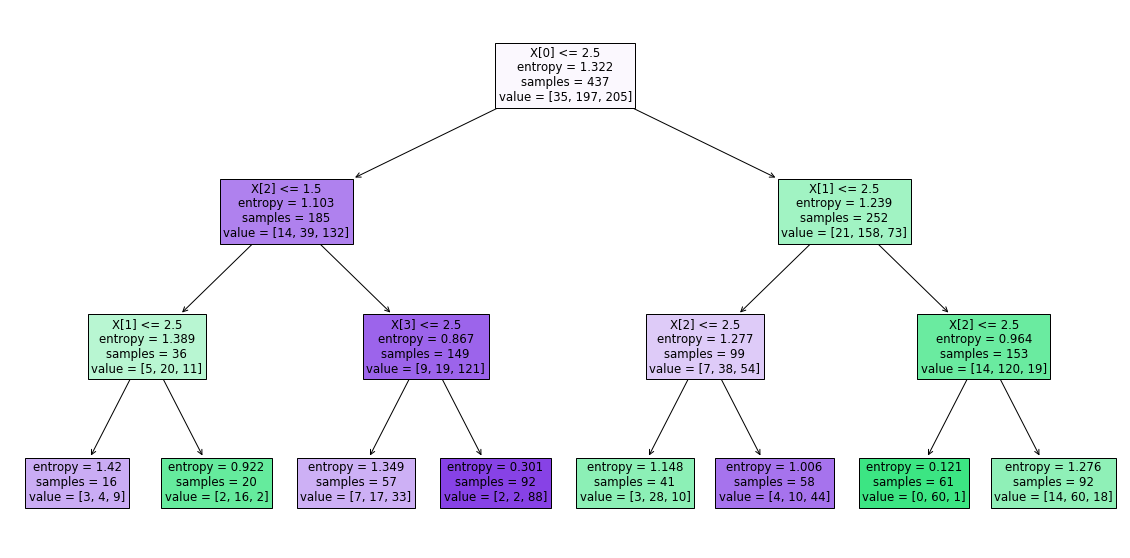

In [15]:
plot_tree_graph(clf_entropy)

In [16]:
print(export_text(clf_entropy))

|--- feature_0 <= 2.50
|   |--- feature_2 <= 1.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- class: R
|   |   |--- feature_1 >  2.50
|   |   |   |--- class: L
|   |--- feature_2 >  1.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- class: R
|   |   |--- feature_3 >  2.50
|   |   |   |--- class: R
|--- feature_0 >  2.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- class: L
|   |   |--- feature_2 >  2.50
|   |   |   |--- class: R
|   |--- feature_1 >  2.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- class: L
|   |   |--- feature_2 >  2.50
|   |   |   |--- class: L

